# Jupyter Workflow
> The classic Jake's workflow revisited using nbdev

In [ ]:
#| default_exp data

In [ ]:
#| export
from urllib.request import urlretrieve
from pathlib import Path
import pandas as pd

In [ ]:
#| export
FREMONT_URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [ ]:
#| export
def get_fremont_data(url:str=FREMONT_URL,  # Web location of the file
                     filename:str='Fremont.csv', # Location of the file on drive
                     force_download:bool=False # if True the redownload
                    ) -> pd.DataFrame:
    """Function return pandas DataFrame based on the url"""
    if force_download or not Path(filename).exists():
        urlretrieve(url=FREMONT_URL, filename='Fremont.csv')
    data = pd.read_csv(filename, index_col='Date', parse_dates=True)
    data.columns = ['Total', 'East', 'West']
    return data

This function does this or that

## Tests

In [ ]:
data = get_fremont_data()

In [ ]:
assert all(data.columns == ["Total", "East", "West"])

In [ ]:
data.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('seaborn')

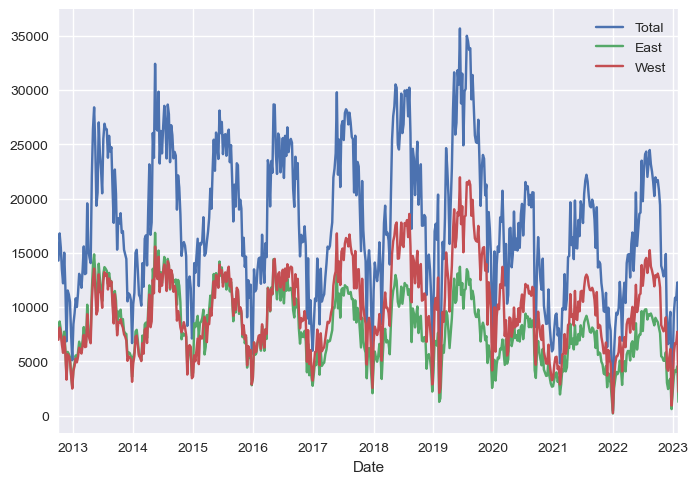

In [ ]:
data.resample('W').sum().plot();

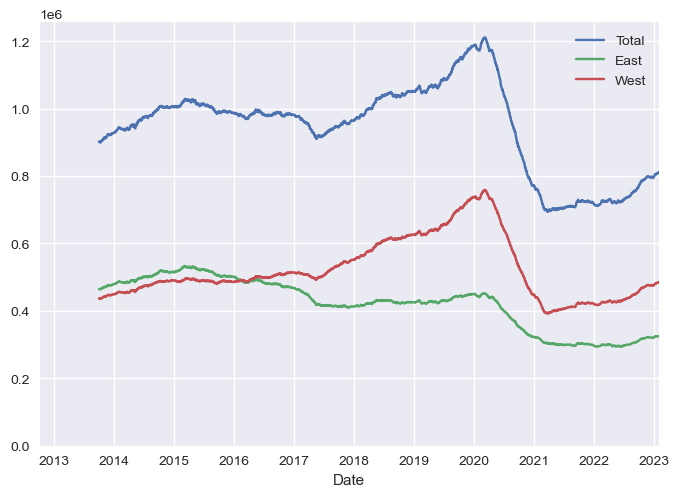

In [ ]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()